In [250]:
import tensorflow as tf
import imageio
import natsort
import glob
import PIL
import IPython
import numpy as np
import matplotlib.pyplot as plt
from model import CVAE
import train
from tensorflow_probability import distributions as tfd
from train import generate_and_save_images
from dataset import preprocess_images
from tensorflow.linalg import matvec
from tensorflow_addons.image import rotate

In [252]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/method5/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


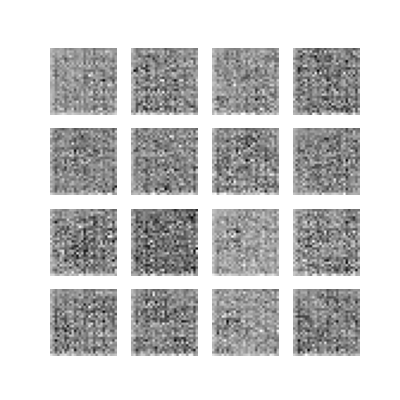

In [253]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

In [254]:
model = CVAE(latent_dim=10)
checkpoint = tf.train.Checkpoint(model=model)
checkpoint.restore("checkpoints/2_18method5/ckpt-6")

In [255]:
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()
test_images = preprocess_images(test_images)

In [256]:
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(10000).batch(32))

num_examples_to_generate = 16

In [257]:
for test_batch in test_dataset.take(1):
    test_sample = test_batch[0:num_examples_to_generate, :, :, :]

In [258]:
def generate_images(model, data):
    fig = plt.figure(figsize=(4, 4))
    for i in range(data.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(data[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.show()

# original image

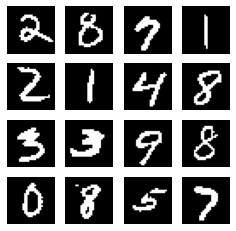

In [259]:
generate_images(model, test_sample)

# After Model translate

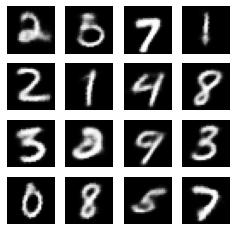

In [260]:
mean, logvar = model.encode(test_sample)
z = model.reparameterize(mean, logvar)
predictions = model.sample(z)
generate_images(model, predictions)

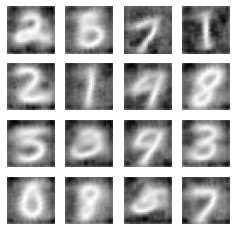

In [282]:
mean, logvar = model.encode(test_sample)
z = model.reparameterize(mean, logvar)
theta = np.radians(10)
r_m = np.identity(model.latent_dim)
c, s = np.cos(theta), np.sin(theta)
r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, s], [-s, c]
rota_z = matvec(tf.cast(r_m, dtype=tf.float32), z)
phi_z = model.decode(rota_z)
generate_images(model, phi_z)

In [286]:
rota_sample = rotate(test_sample, 60)

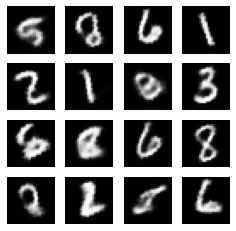

In [287]:
mean, logvar = model.encode(rota_sample)
z = model.reparameterize(mean, logvar)
predictions = model.sample(z)
generate_images(model, predictions)

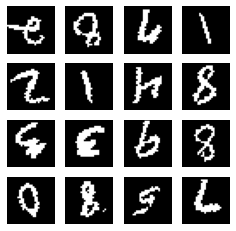

In [288]:
generate_images(model, rota_sample)

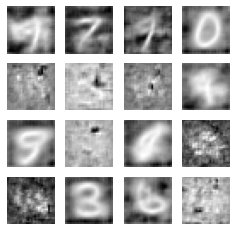

In [217]:
generate_images(model, test)

In [246]:
train.compute_loss(model, test_sample)

<tf.Tensor: shape=(), dtype=float32, numpy=107.67994>